In [1]:
import pandas as pd
from matplotlib import pyplot as plt

## Preparing training data

In [2]:
data = pd.read_csv('train.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Deleting columns that definitely do not contain any useful information

In [3]:
data = data.drop(columns = ['PassengerId', 'Name', 'Ticket'])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


Defining columns with NaN values

In [4]:
columns_with_empty_cells = [column for column in data.columns if data[column].isna().any()]
for column in columns_with_empty_cells:
    print(f'{column} NaN count: {data[column].isna().sum()} ({data[column].isna().sum()/len(data)*100:.2f}%)')

Age NaN count: 177 (19.87%)
Cabin NaN count: 687 (77.10%)
Embarked NaN count: 2 (0.22%)


Since there are 77% of NaN values in 'Cabin' column, we will just drop it

In [5]:
data = data.drop(columns = ['Cabin'])

As there are only 2 missing values in 'Embarked' column, we will use mode as an interpolation method.

In [6]:
embarked_mode = data['Embarked'].mode().values[0]
data.loc[data['Embarked'].isna(),'Embarked'] = embarked_mode

In [7]:
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
data.corr().style.background_gradient(cmap='Reds_r')

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


As we can see, 'Age' variable has the strongest correlation with the 'Pclass' variable, so to fill NaN values in the column 'Age', we will compute median of age distribution of passengers grouped by 'Pclass'.

In [9]:
avg_age_by_pclass = data.groupby('Pclass').median()['Age']
avg_age_by_pclass

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [10]:
for Pclass in avg_age_by_pclass.index:
    data.loc[(data['Age'].isna()) & (data['Pclass']==Pclass),'Age'] = avg_age_by_pclass[Pclass]

In [11]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


'Survived' is a target variable and class labels are already encoded as integers.'Pclass' depicts a socio-economic status of the passenger, where 1 is the highest class and 3 is the lowest, so it can be considered as ordinal variable and will be left unchanged. 'Age', 'SibSp', 'Parch' and 'Fare' are all numeric variables and have the correct format.'Sex' and 'Embarked' are nominal variables, since we can not say that female>male or Cherbourg>Southampton. These variables must be converted to the proper format.

In [13]:
data = pd.get_dummies(data, columns = ['Sex', 'Embarked'])
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


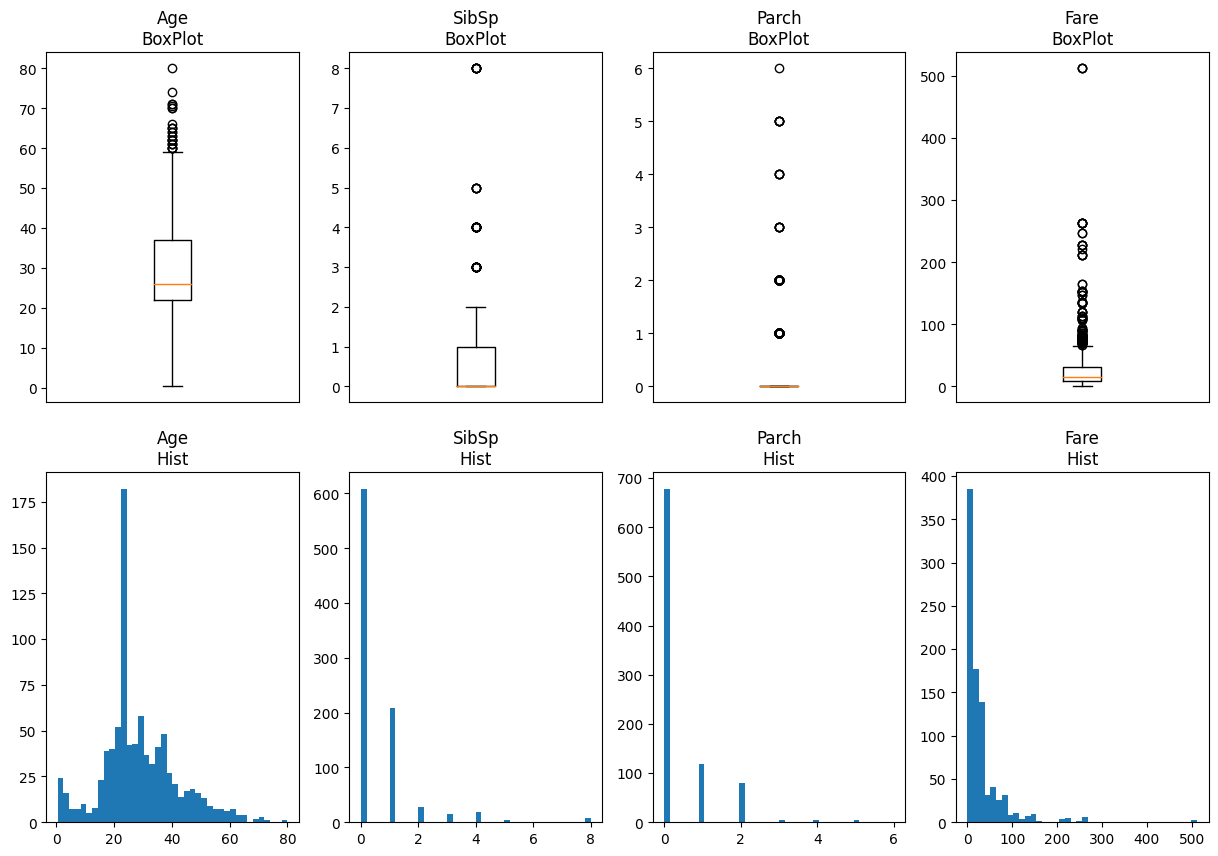

In [14]:
numeric = [ 'Age', 'SibSp', 'Parch', 'Fare' ]
fig = plt.figure(figsize = (15,10))
for i, column in enumerate(numeric):
    ax = fig.add_subplot(2,4,i+1)
    ax.boxplot(data[column])
    ax.set_xticks([])
    ax.set_title(f'{column}\nBoxPlot')
    
    ax = fig.add_subplot(2,4,i+5)
    ax.hist(data[column], bins = 40)
    ax.set_title(f'{column}\nHist')

## Preparing testing data

In [82]:
test = pd.read_csv('test.csv', index_col = 'PassengerId')
test.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C


In [83]:
test = test.drop(columns = ['Name', 'Ticket', 'Cabin'])
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


In [84]:
columns_with_empty_cells = [column for column in test.columns if test[column].isna().any()]
for column in columns_with_empty_cells:
    print(f'{column} NaN count: {test[column].isna().sum()} ({test[column].isna().sum()/len(test)*100:.2f}%)')

Age NaN count: 86 (20.57%)
Fare NaN count: 1 (0.24%)


In [85]:
fare_median = test['Fare'].median()
test.loc[test['Fare'].isna(),'Fare'] = fare_median

In [86]:
avg_age_by_pclass_test = test.groupby('Pclass').median()['Age']
for Pclass in avg_age_by_pclass_test.index:
    test.loc[(test['Age'].isna()) & (test['Pclass']==Pclass),'Age'] = avg_age_by_pclass_test[Pclass]

In [87]:
test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [88]:
test = pd.get_dummies(test, columns = ['Sex', 'Embarked'])
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
892,3,34.5,0,0,7.8292,0,1,0,1,0
893,3,47.0,1,0,7.0000,1,0,0,0,1
894,2,62.0,0,0,9.6875,0,1,0,1,0
895,3,27.0,0,0,8.6625,0,1,0,0,1
896,3,22.0,1,1,12.2875,1,0,0,0,1


## Splitting  data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
y = data['Survived']
X = data.drop(columns = ['Survived'])

In [24]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

## GradientBoostingClassifier, GridSearch

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
param_grid = {'n_estimators': [400,500,600],
              'learning_rate':[0.1, 0.2],
              'max_depth': [1, 2]}

In [66]:
gb = GradientBoostingClassifier()

In [67]:
gs = GridSearchCV(estimator = gb,
                  param_grid = param_grid,
                  scoring='accuracy',
                  cv=10,
                  refit = True)

In [68]:
gs = gs.fit(X_train, y_train)

In [69]:
gs.best_score_

0.8338906968914825

In [70]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500}

In [74]:
gb = gb.fit(X_train, y_train)

In [76]:
gb.score(X_valid, y_valid)

0.8071748878923767

## Test predict

In [93]:
submission = pd.concat([pd.Series(test.index), pd.Series(gb.predict(test))], axis = 1)
submission.head()

,PassengerId,0
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [94]:
submission = submission.to_csv('titanic.csv',index=False)